In [1]:
#Importing necessary packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline


In [2]:
data = pd.read_csv("Googleplaystore.csv") # Importing the data file.

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
data.shape

(10841, 13)

In [7]:
# Checking for missing values.
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Price,0,0.000000
Installs,0,0.000000
Size,0,0.000000


In [8]:
data.dropna(how ='any', inplace = True) #Removing the missing values.

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0
Type,0,0.0
Installs,0,0.0
Size,0,0.0
Reviews,0,0.0


In [10]:
data.shape

(9360, 13)

After removing the missing values, we have got 9360 records with 13 variables.


# Rating

In [11]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

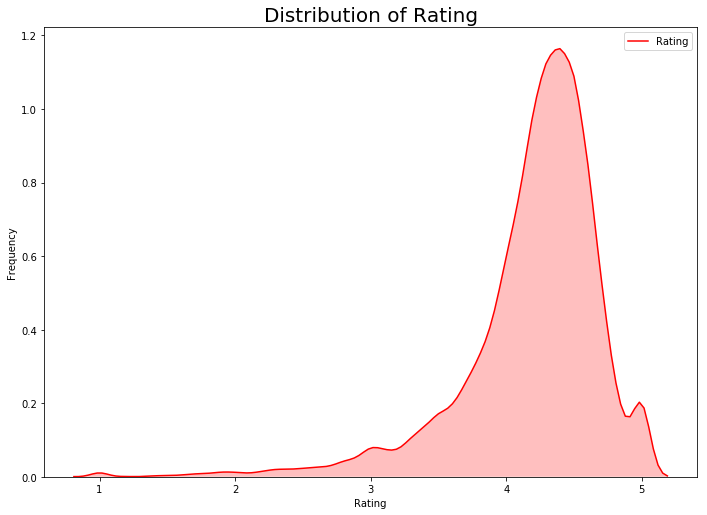

In [12]:
# Frequency plot of different ratings.
rcParams['figure.figsize'] = (11.7,8.27)
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

The average rating of apps in the play store is 4, which is quiet high.

# Categories

In [13]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique()) # Various app categories in the play store.

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

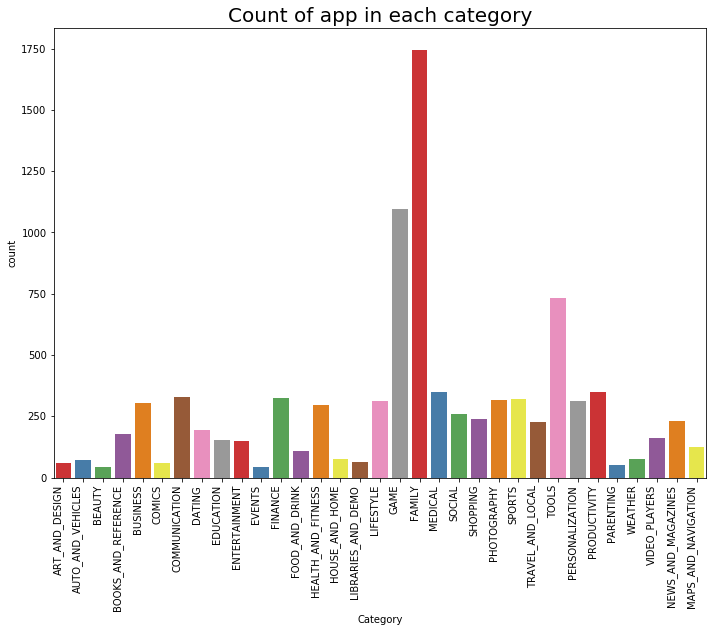

In [14]:
# Frequency plot of of apps in different categories.
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

Family category has the highest number of app appereances followed by Game and Tool.

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

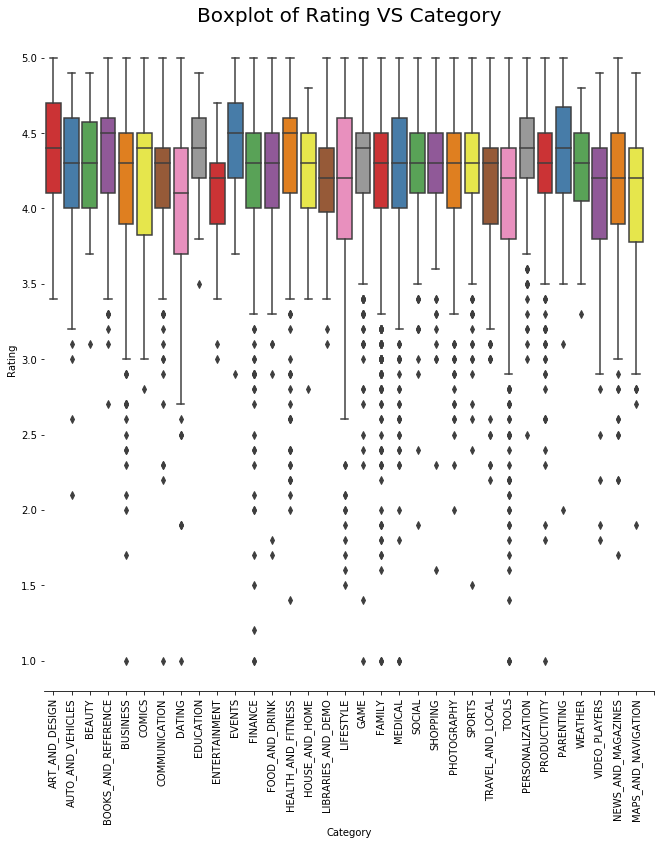

In [15]:
# Rating Vs Category plot.
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

There isn't much difference between rating of apps in different categories. 

# Reviews

In [16]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [17]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x)) # Convert to int.

In [18]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

Text(0.5, 1.0, 'Distribution of Reveiw')

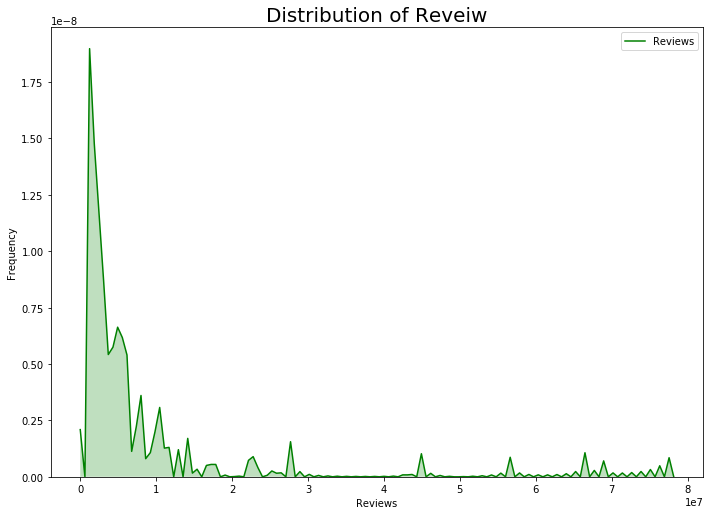

In [19]:
# Rating distribution. 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

In [20]:
data[data.Reviews > 5000000].head() # Applications with more than 5 million reviews.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


While most apps have less than 1 million reviews, well-known apps have a lot reviews. 

<Figure size 720x720 with 0 Axes>

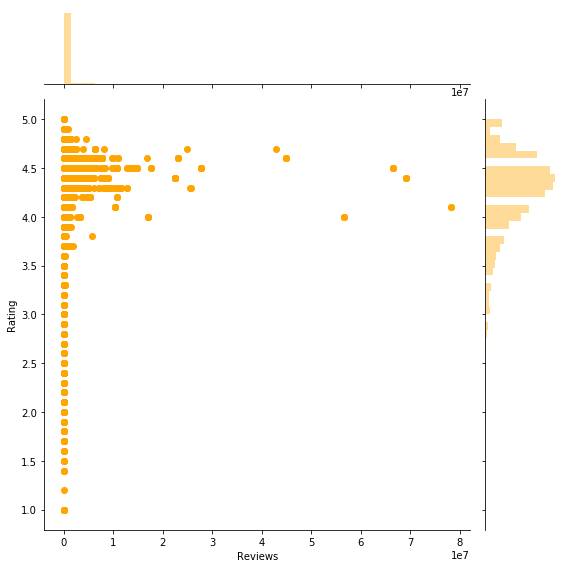

In [21]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,size = 8) # Reviews Vs Rating plot.

Text(0.5, 1.0, 'Rating VS Reveiws')

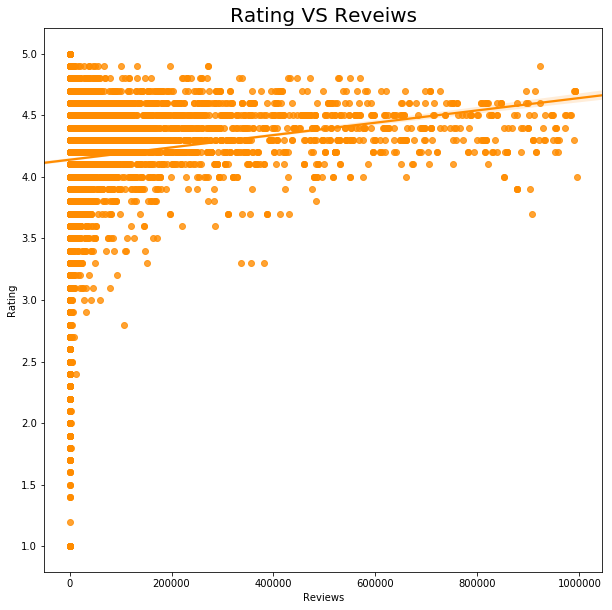

In [22]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]); # Rating Vs Reviews, apps with less than 1million reviews.
plt.title('Rating VS Reveiws',size = 20)

A well-known application will get a good rating.

# Size

In [23]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [24]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [25]:
len(data[data.Size == 'Varies with device']) # Checking for "Varies with device"

1637

In [26]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) # Replacing "Varies with device" with NA

In [27]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int)) # Convert the rest of the data into int

In [28]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True) # Replace the missing with mean in each category

<Figure size 720x720 with 0 Axes>

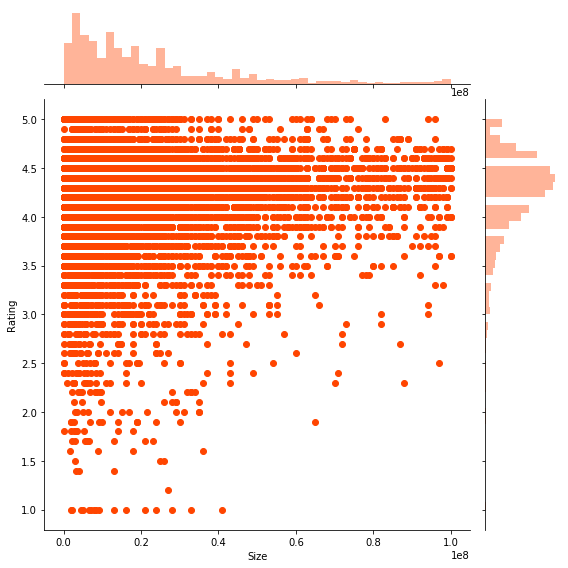

In [29]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, size = 8); # Size Vs Rating.

# Installs

In [30]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [31]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

The data is in object type and has plus sign.

In [32]:
# Encoding the data by the order of size.
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x)) 

In [33]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [34]:
Sorted_value = sorted(list(data['Installs'].unique()))

In [35]:
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

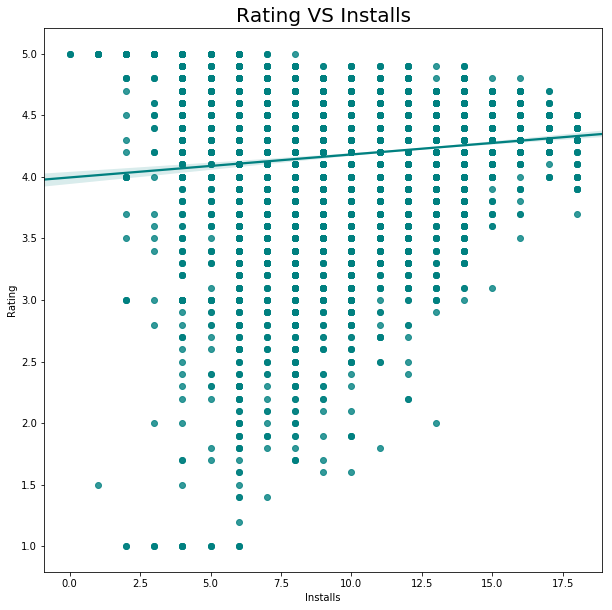

In [36]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data); # Rating Vs Installs. 
plt.title('Rating VS Installs',size = 20)

Number of Installs impact the Rating.

# Type

In [37]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

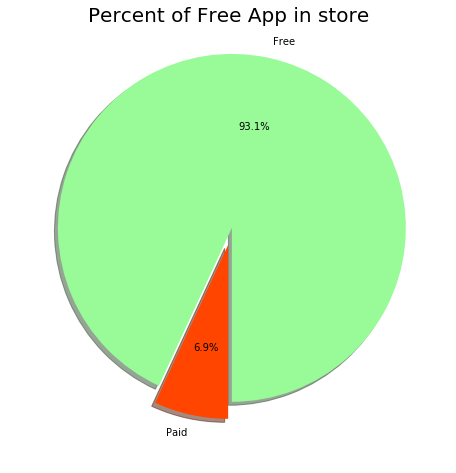

In [38]:
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()


From the data it clear that the most(93%) of the apps are free apps.

In [39]:
# Because string can't enter to model, need to change format a little bit
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

# Price

In [40]:
data['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [41]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [42]:
data['Price'].value_counts().head(10)

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
$3.99      58
$1.49      30
$2.49      21
$5.99      18
$9.99      16
Name: Price, dtype: int64

In [43]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x)) # Changing the data into int.

In [44]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average of price is around 0.96, but most of them are free (8715 from 9360).
The most expensive app is 400 dollar.

In [45]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'Scatter plot Rating VS Price')

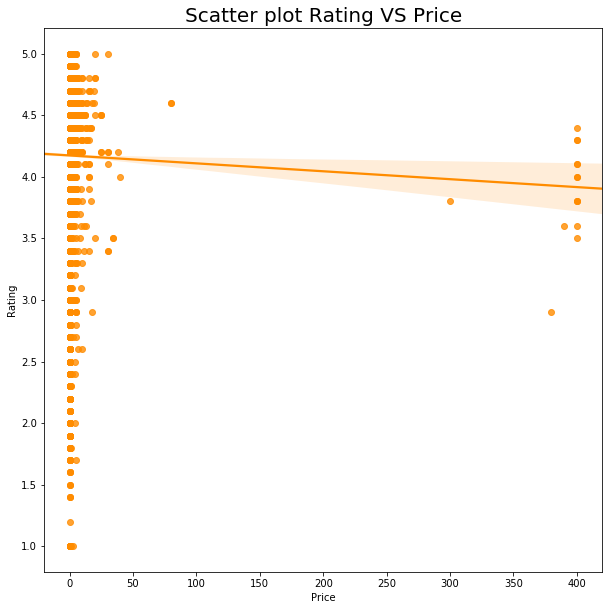

In [46]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]); # Rating Vs Price.
plt.title('Scatter plot Rating VS Price',size = 20)

If the application price is high, there is a high chance the application would disappoint the customer if it doesn't feel like it's worth the cost.

In [47]:
# Giving different labels to different priceband.
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 Unaffordable'

In [48]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 Unaffordable,3.923810


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

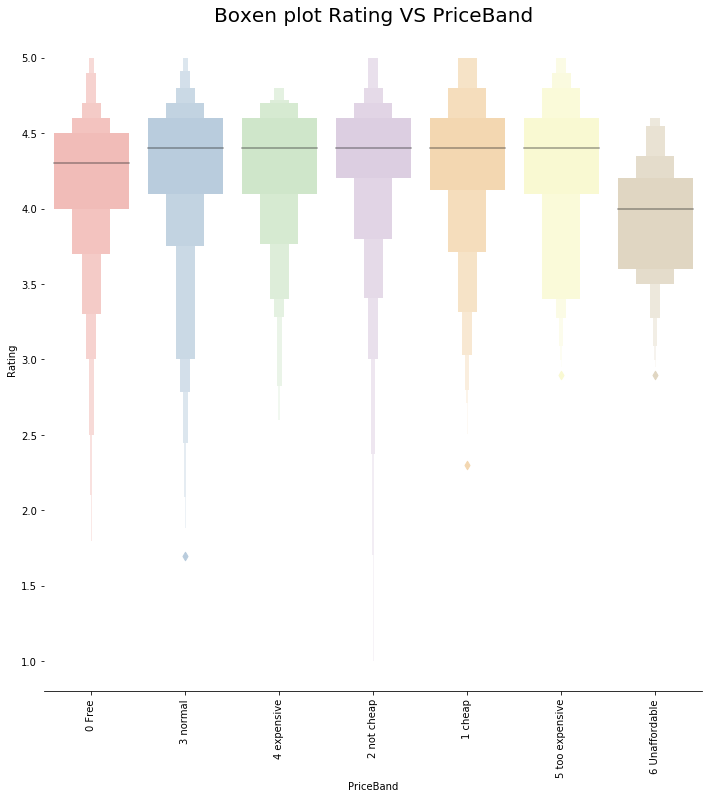

In [49]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Pastel1") # Rating Vs PriceBand
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

Price doesn't seem to impact the rating in most cases, unless the price is quite high.

In [50]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [51]:
# Create palette for categories
flatui = []
for i in range(0,len(data['Category'].unique()),1):
    flatui.append(generate_color())

Text(0.5, 1.0, 'Category in each Priceband VS Rating')

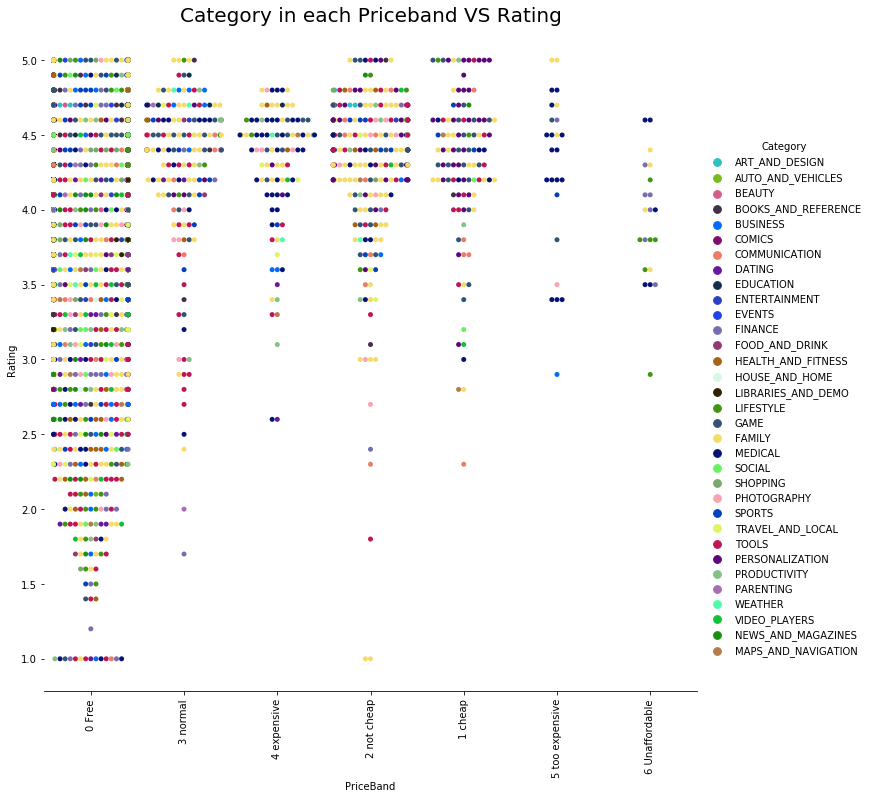

In [53]:
g = sns.catplot(x="PriceBand", y="Rating", hue="Category", kind="swarm", data=data,palette = flatui,size = 10) # Catergory wise PriceBand Vs Rating
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.title('Category in each Priceband VS Rating',size = 20)

# Content Rating

In [54]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

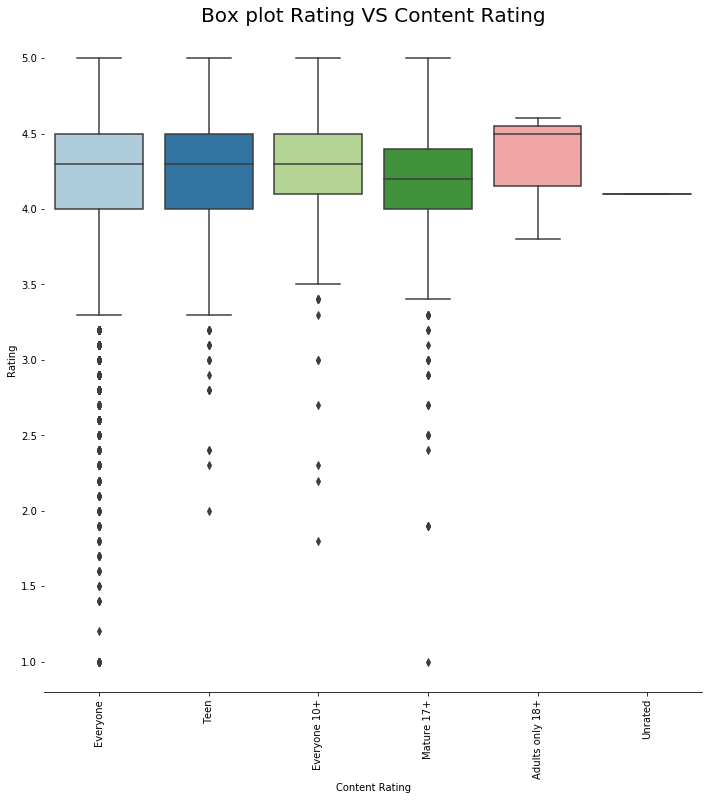

In [55]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired") # ContentRating Vs Rating
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

In most cases Content Rating doesn't seem to impact Rating, but in Mature applications the rating seems to be lower than other applications

In [56]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


There seems to be a single application with Unrated content rating.

In [57]:
data = data[data['Content Rating'] != 'Unrated']

Since there is only a single application with Unrated content rating, decided to remove it.

In [58]:
data.shape

(9359, 14)

In [59]:
data = pd.get_dummies(data, columns= ["Content Rating"])

# Genres

In [60]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [61]:
data.Genres.value_counts().head(30)

Tools                      731
Entertainment              533
Education                  468
Action                     358
Productivity               351
Medical                    350
Sports                     333
Communication              328
Finance                    323
Photography                317
Lifestyle                  313
Personalization            312
Business                   303
Health & Fitness           297
Social                     259
Shopping                   238
News & Magazines           233
Travel & Local             225
Arcade                     207
Dating                     195
Simulation                 194
Casual                     185
Books & Reference          178
Video Players & Editors    158
Maps & Navigation          124
Puzzle                     120
Food & Drink               109
Role Playing               106
Strategy                   103
Racing                      93
Name: Genres, dtype: int64

In [62]:
data.Genres.value_counts().tail(30)

Entertainment;Creativity               3
Video Players & Editors;Creativity     2
Books & Reference;Education            2
Entertainment;Pretend Play             2
Art & Design;Pretend Play              2
Strategy;Action & Adventure            2
Puzzle;Creativity                      2
Casual;Music & Video                   2
Card;Action & Adventure                2
Adventure;Education                    2
Puzzle;Education                       1
Board;Pretend Play                     1
Card;Brain Games                       1
Parenting;Brain Games                  1
Lifestyle;Education                    1
Role Playing;Brain Games               1
Communication;Creativity               1
Entertainment;Education                1
Health & Fitness;Action & Adventure    1
Music & Audio;Music & Video            1
Comics;Creativity                      1
Arcade;Pretend Play                    1
Tools;Education                        1
Racing;Pretend Play                    1
Lifestyle;Preten

Since many Genres have very few records, it may create a bias.
So we group them into a larger genre by ignoring the sub-genre.

In [63]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [64]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [65]:
data.Genres.value_counts().tail(10)

Comics           58
Parenting        50
Card             48
Events           45
Beauty           42
Casino           37
Word             28
Trivia           28
Music            24
Music & Audio     1
Name: Genres, dtype: int64

In [66]:
data['Genres'].replace('Music & Audio', 'Music',inplace = True) # Grouping the Music and Audio as Music

In [67]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [68]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [69]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
18,Events,4.435556


Observing from Standard Deviation, seem like genre is not effect too much to rating.
The lowest of an average rating on genres (Dating) is 3.97 
while the highest (Events) is 4.43

Text(0.5, 1.0, 'Boxenplot of Rating VS Genres')

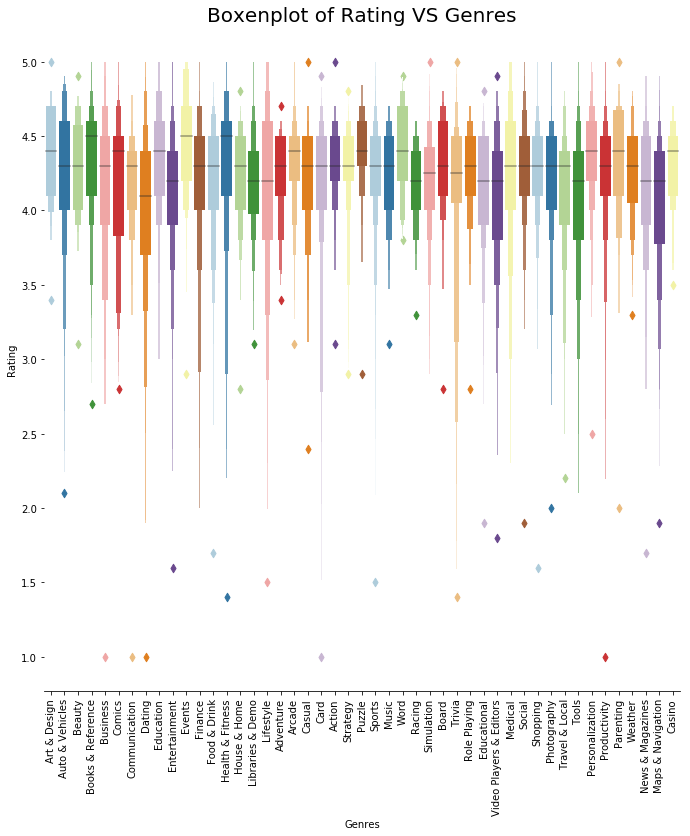

In [70]:
g = sns.catplot(x="Genres",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Paired") # Rating Vs Genre
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

# Last Updated

In [71]:
data['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

"Last Updated" feature still in String format, we need to change it in to a format that can be used for plot or put it in model

Change it to "date-time" format but it still can't use in raw,

Create new feature which called "lastupdate",

"lastupdate" will contain how long is this app got update in last time (... days ago).

Assume that today is the day which the latest Update of application in this dataset (2018 - 08 -08)

In [72]:
data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()

count                    9359
unique                   1298
top       2018-08-03 00:00:00
freq                      319
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: new, dtype: object

In [73]:
# new format of  Last Updated
data['new'].max() 

Timestamp('2018-08-08 00:00:00')

In [74]:
# Example of finding difference between two dates in pandas
data['new'][0] -  data['new'].max()

Timedelta('-213 days +00:00:00')

In [75]:
data['lastupdate'] = (data['new'] -  data['new'].max()).dt.days # last Updated is in the units of days.
data['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

Text(0.5, 1.0, 'Rating  VS Last Update( days ago )')

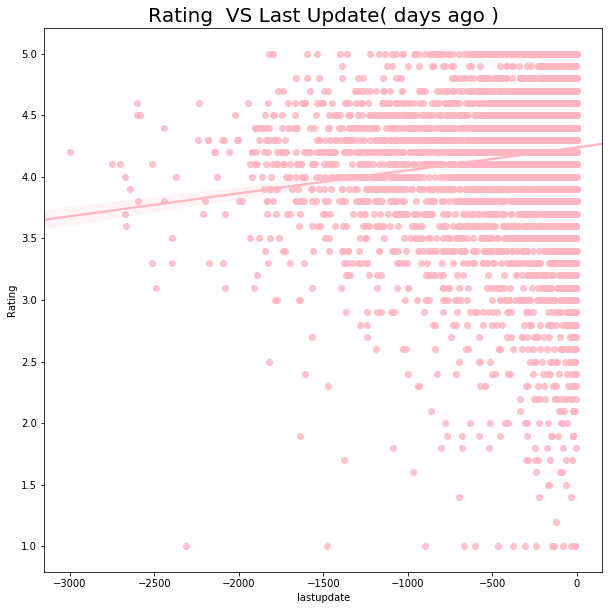

In [76]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightpink',data=data ); # Rating Vs Last Update(days)
plt.title('Rating  VS Last Update( days ago )',size = 20)

Most apps with higher rating seem to be updated in the last 2000-1500 days. 

In [77]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 Free,0,1,0,0,0,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,1,0 Free,0,1,0,0,0,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 Free,0,1,0,0,0,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 Free,0,0,0,0,1,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design,"June 20, 2018",1.1,4.4 and up,1,0 Free,0,1,0,0,0,2018-06-20,-49


In [78]:
data.shape

(9359, 20)